In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## load dataset

In [4]:
# memanggil dataset

data = pd.read_csv('data_tokped_bersih2.csv')
data.head()

,ulasan,rating,Label
0,"aplikasi favorit buat belanja online, ui simpl...",5,Positif
1,"aplikasi nya bagus, nya update tan terakhir . ...",1,Negatif
2,aplikasi yg sangat bagus membantu. sekedar sar...,5,Positif
3,apk udah gak aktif sejak beberapa bulan yg lal...,2,Negatif
4,"app nya jadi aneh, loading lambat, fitur hapus...",1,Negatif


## preprocessing text

casefolding (membersihkan data)

In [5]:
import re

# membuat fungsi untuk casefolding
def casefolding(text):
    text = text.lower()                     # merubah teks menjadi huruf kecil
    text = re.sub(r'[-+]?[0-9]+', '', text) # menghilangkan angka
    text = re.sub(r'[^\w\s]', '', text)     # menghapus tanda baca atau karakter
    text = text.strip()
    return text

In [6]:
# menampilkan before after
raw_sample = data['ulasan'].iloc[3]
case_folding = casefolding(raw_sample)

print('Raw data\t : ', raw_sample)
print('Case Folding\t : ', case_folding)

Raw data	 :  apk udah gak aktif sejak beberapa bulan yg lalu. pengalaman order produk ekspedisi sicepat, butuh waktu 14 hari dong yg 3 hari paling lama 4 hari. udah senang limit 500rb paylater toped. pembayaran gak pernah lewat jatuh tempo. beberapa bulan lunas, berharap nilai limit tambah sesudahnya gak bertambah tetap 500rb. kesannya ada pengalaman belanja yg baik. udah paling nyaman apk oren. terimakasih banyak atas pengalaman nya.
Case Folding	 :  apk udah gak aktif sejak beberapa bulan yg lalu pengalaman order produk ekspedisi sicepat butuh waktu  hari dong yg  hari paling lama  hari udah senang limit rb paylater toped pembayaran gak pernah lewat jatuh tempo beberapa bulan lunas berharap nilai limit tambah sesudahnya gak bertambah tetap rb kesannya ada pengalaman belanja yg baik udah paling nyaman apk oren terimakasih banyak atas pengalaman nya


word normalisasi

In [7]:
key_norm = pd.read_csv('kata_normal.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkatan'] == word]['hasil'].values[0]
    if (key_norm['singkatan'] == word).any()
    else word for word in text.split()
    ])

    text = str.lower(text)
    return text

In [8]:
# menampilkan before after
raw_data = data['ulasan'].iloc[4]
word_normal = text_normalize(raw_data)

print('raw data\t : ', raw_data)
print('word normalized\t : ', word_normal)

raw data	 :  app nya jadi aneh, loading lambat, fitur hapus keranjang ribet, enak yg dulu tinggal swipe. minim promo, banyak produk yg udah di label bebas ongkir, jadi bayar ongkir. biasanya sekelas official store, semua produknya bebas ongkir, sekarang udah beda. kayanya udah waktunya buat salam perpisahan ama goto. si ijo udah berubah mau tokopedia ataupun gojek. padahal dulu jadi andalan banget, maaf pindah lain hati yg lebih user friendly, terimakasih 🙏
word normalized	 :  aplikasi nya jadi aneh, loading lambat, fitur hapus keranjang ribet, enak yang dulu tinggal swipe. minim promo, banyak produk yang udah di label bebas ongkir, jadi bayar ongkir. biasanya sekelas official store, semua produknya bebas ongkir, sekarang udah beda. kayanya udah waktunya buat salam perpisahan ama goto. si ijo udah berubah mau tokopedia ataupun gojek. padahal dulu jadi andalan banget, maaf pindah lain hati yang lebih user friendly, terimakasih 🙏


filtering (stopword removal)

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [10]:
len(stopwords_ind)

758

In [11]:
# melihat daftar stopword
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [12]:
# membuat fungsi stopword removal

# menambahkan kata dalam stopword
more_stopword = ['hrs','yg','app','si']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_word(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [13]:
# menampilkan before after
raw_sample = data['ulasan'].iloc[4]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)

print('raw data\t : ', raw_sample)
print('case folding\t : ', case_folding)
print('stopword removal  :', stopword_removal)

raw data	 :  app nya jadi aneh, loading lambat, fitur hapus keranjang ribet, enak yg dulu tinggal swipe. minim promo, banyak produk yg udah di label bebas ongkir, jadi bayar ongkir. biasanya sekelas official store, semua produknya bebas ongkir, sekarang udah beda. kayanya udah waktunya buat salam perpisahan ama goto. si ijo udah berubah mau tokopedia ataupun gojek. padahal dulu jadi andalan banget, maaf pindah lain hati yg lebih user friendly, terimakasih 🙏
case folding	 :  app nya jadi aneh loading lambat fitur hapus keranjang ribet enak yg dulu tinggal swipe minim promo banyak produk yg udah di label bebas ongkir jadi bayar ongkir biasanya sekelas official store semua produknya bebas ongkir sekarang udah beda kayanya udah waktunya buat salam perpisahan ama goto si ijo udah berubah mau tokopedia ataupun gojek padahal dulu jadi andalan banget maaf pindah lain hati yg lebih user friendly terimakasih
stopword removal  : nya aneh loading lambat fitur hapus keranjang ribet enak tinggal swi

## stemming

In [14]:
!pip -q install sastrawi

In [15]:
# merubah menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi untuk steming
def stemming(text):
    text = stemmer.stem(text)
    return text

In [16]:
# menampilkan before after
raw_sample = data['ulasan'].iloc[4]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)
text_stemming = stemming(stopword_removal)

print('raw data\t : ', raw_sample)
print('case folding\t : ', case_folding)
print('stopword removal : ', stopword_removal)
print('stemming\t : ', text_stemming)

raw data	 :  app nya jadi aneh, loading lambat, fitur hapus keranjang ribet, enak yg dulu tinggal swipe. minim promo, banyak produk yg udah di label bebas ongkir, jadi bayar ongkir. biasanya sekelas official store, semua produknya bebas ongkir, sekarang udah beda. kayanya udah waktunya buat salam perpisahan ama goto. si ijo udah berubah mau tokopedia ataupun gojek. padahal dulu jadi andalan banget, maaf pindah lain hati yg lebih user friendly, terimakasih 🙏
case folding	 :  app nya jadi aneh loading lambat fitur hapus keranjang ribet enak yg dulu tinggal swipe minim promo banyak produk yg udah di label bebas ongkir jadi bayar ongkir biasanya sekelas official store semua produknya bebas ongkir sekarang udah beda kayanya udah waktunya buat salam perpisahan ama goto si ijo udah berubah mau tokopedia ataupun gojek padahal dulu jadi andalan banget maaf pindah lain hati yg lebih user friendly terimakasih
stopword removal :  nya aneh loading lambat fitur hapus keranjang ribet enak tinggal swi

## text preprocessing pipeline

In [17]:
# membuat fungsi untuk menggabungkan seluruh langkah teks preprocessing

def text_preprocessing_proses(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    text = stemming(text)
    return text

In [18]:
%%time
data['clean_teks']= data['ulasan'].apply(text_preprocessing_proses)

CPU times: total: 4min 53s
Wall time: 17min 39s


In [19]:
data

,ulasan,rating,Label,clean_teks
0,"aplikasi favorit buat belanja online, ui simpl...",5,Positif,aplikasi favorit belanja online ui simple mitr...
1,"aplikasi nya bagus, nya update tan terakhir . ...",1,Negatif,aplikasi nya bagus nya update tan update tan u...
2,aplikasi yg sangat bagus membantu. sekedar sar...,5,Positif,aplikasi bagus bantu dar saran baik expedisi k...
3,apk udah gak aktif sejak beberapa bulan yg lal...,2,Negatif,aplikasi udah gak aktif alam order produk eksp...
4,"app nya jadi aneh, loading lambat, fitur hapus...",1,Negatif,aplikasi nya aneh loading lambat fitur hapus k...
...,...,...,...,...
904,udh afknya setiap mau beli pulsa katanya dana ...,4,Positif,udh afknya beli pulsa dana saldo gopy kembali ...
905,toped is the best deh. sekian banyak transaksi...,5,Positif,toped is the best deh sekian transaksi lancar ...
906,"sering voucher gratis ongkir , pengiriman cepa...",5,Positif,voucher gratis ongkir kirim cepat mantappp
907,"kmrn udh cekout udh transfer, trs dibatalin si...",2,Negatif,kmrn udh cekout udh transfer trs dibatalin sis...


In [20]:
data = data.replace({'Positif':1, 'Negatif':0})
data.head()

,ulasan,rating,Label,clean_teks
0,"aplikasi favorit buat belanja online, ui simpl...",5,1,aplikasi favorit belanja online ui simple mitr...
1,"aplikasi nya bagus, nya update tan terakhir . ...",1,0,aplikasi nya bagus nya update tan update tan u...
2,aplikasi yg sangat bagus membantu. sekedar sar...,5,1,aplikasi bagus bantu dar saran baik expedisi k...
3,apk udah gak aktif sejak beberapa bulan yg lal...,2,0,aplikasi udah gak aktif alam order produk eksp...
4,"app nya jadi aneh, loading lambat, fitur hapus...",1,0,aplikasi nya aneh loading lambat fitur hapus k...


In [67]:
# simpan data yang sudah dipreprocessing ke dalam file csv
data.to_csv('data_clean.csv')

## featur Engineering

In [21]:
# memisahkah feature dan target
x = data['clean_teks']
y = data['Label']

In [22]:
x

0      aplikasi favorit belanja online ui simple mitr...
1      aplikasi nya bagus nya update tan update tan u...
2      aplikasi bagus bantu dar saran baik expedisi k...
3      aplikasi udah gak aktif alam order produk eksp...
4      aplikasi nya aneh loading lambat fitur hapus k...
                             ...                        
904    udh afknya beli pulsa dana saldo gopy kembali ...
905    toped is the best deh sekian transaksi lancar ...
906           voucher gratis ongkir kirim cepat mantappp
907    kmrn udh cekout udh transfer trs dibatalin sis...
908       suka tokopedia daftar sistem paylaternya mudah
Name: clean_teks, Length: 909, dtype: object

In [23]:
y

0      1
1      0
2      1
3      0
4      0
      ..
904    1
905    1
906    1
907    0
908    1
Name: Label, Length: 909, dtype: int64

## featur extraction (tf-idf dan n-gram)

In [24]:
# save model
import pickle

#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

#unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)

x_tf_idf = vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.sav", "wb"))

In [25]:
# vocab dari tf-idf
vec_TF_IDF.vocabulary_

{'aplikasi': 152,
 'favorit': 939,
 'belanja': 321,
 'online': 2232,
 'ui': 3357,
 'simple': 2925,
 'mitratoko': 1969,
 'percaya': 2400,
 'suka': 3043,
 'kesel': 1492,
 'proses': 2522,
 'kirim': 1515,
 'barang': 267,
 'lebih': 1711,
 'estimasi': 913,
 'ekspedisi': 877,
 'orang': 2244,
 'keluh': 1454,
 'lion': 1756,
 'parcel': 2315,
 'waswas': 3454,
 'kalo': 1395,
 'paket': 2290,
 'handover': 1118,
 'copot': 611,
 'aja': 49,
 'mitra': 1968,
 'layan': 1701,
 'pegawai': 2351,
 'review': 2638,
 'playstore': 2455,
 'google': 1054,
 'maps': 1866,
 'nya': 2169,
 'bagus': 217,
 'update': 3384,
 'tan': 3077,
 'bikin': 391,
 'susah': 3057,
 'akses': 65,
 'wishlist': 3465,
 'hilang': 1159,
 'menu': 1929,
 'keranjang': 1476,
 'hapus': 1127,
 'otomatis': 2262,
 'klik': 1525,
 'tong': 3271,
 'sampahrecycle': 2706,
 'bin': 395,
 'mudah': 2010,
 'sulit': 3046,
 'langgan': 1680,
 'updaten': 3387,
 'bantu': 263,
 'dar': 659,
 'saran': 2727,
 'baik': 227,
 'expedisi': 923,
 'komplain': 1551,
 'jgn': 1350

In [26]:
print(len(vec_TF_IDF.get_feature_names_out()))

3497


In [27]:
print(vec_TF_IDF.get_feature_names_out())

['abai' 'abal' 'abis' ... 'yuk' 'zaman' 'zonk']


In [28]:
x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf = pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,abai,abal,abis,ac,acah,acak,account,acehpapua,acount,acu,...,yamau,yatolong,yawah,yey,ygpaling,yh,you,yuk,zaman,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data_tabular_tf_idf.iloc[10:20,60:70]

,akal,akalakalan,akan,akhhparah,akibat,akses,aktif,aktifin,aktifitas,akulaku
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256787,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


## Feature Selection

In [30]:
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=3000)
x_kbest_features = chi2_features.fit_transform(x_train, y_train)

# untuk reduced featur
print('Original Feature Number', x_train.shape[1])
print('Reduced feature Number', x_kbest_features.shape[1])

Original Feature Number 3497
Reduced feature Number 3000


In [32]:
Data = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.176944
1,0.213505
2,0.309746
3,0.066380
4,0.047682
...,...
3492,1.886282
3493,2.040693
3494,1.414101
3495,0.043952


In [33]:
# menampilkan feature dan nilainya
feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur']=feature
Data

,Nilai,Fitur
0,0.176944,abai
1,0.213505,abal
2,0.309746,abis
3,0.066380,ac
4,0.047682,acah
...,...,...
3492,1.886282,yh
3493,2.040693,you
3494,1.414101,yuk
3495,0.043952,zaman


In [34]:
# mengurutkan nilai feature
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
2010,15.393990,mudah
1993,8.451223,moga
1856,7.903303,mantap
2727,6.992947,saran
86,6.876657,alhamdulillah
...,...,...
1567,0.000112,konsumen
490,0.000108,buka
1876,0.000101,masalah
984,0.000063,gabung


In [35]:
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True, False])

In [36]:
# menampilkan fitur yang terpilih berdasarkan nilai mask tertinggi
new_feature=[]
for bool, f in zip(mask, feature):
    if bool :
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['abai',
 'abal',
 'abis',
 'ac',
 'acah',
 'acak',
 'account',
 'acehpapua',
 'acount',
 'acu',
 'ad',
 'ada',
 'adaa',
 'adad',
 'adain',
 'adajangan',
 'adakan',
 'adamantap',
 'adan',
 'adds',
 'adik',
 'adil',
 'adildengan',
 'admin',
 'admincs',
 'adminnya',
 'adminya',
 'aduh',
 'aduk',
 'affiliate',
 'afknya',
 'aga',
 'agam',
 'agent',
 'agts',
 'agustus',
 'ah',
 'ahh',
 'ahirnya',
 'ai',
 'ain',
 'aj',
 'aja',
 'ajacepet',
 'ajah',
 'ajaib',
 'ajak',
 'ajar',
 'ak',
 'akal',
 'akalakalan',
 'akan',
 'akhhparah',
 'akses',
 'aktif',
 'aktifitas',
 'akulaku',
 'akun',
 'akunkalo',
 'akurasi',
 'alam',
 'alamat',
 'alamibarang',
 'alang',
 'alas',
 'alat',
 'alesan',
 'alesannya',
 'alfa',
 'alfamart',
 'algoritma',
 'alhamdulillah',
 'alhamdulillaj',
 'alhamdulliah',
 'alhasil',
 'ali',
 'alias',
 'alih',
 'allah',
 'alternatif',
 'aman',
 'amanah',
 'amatbingung',
 'amatredmi',
 'amburadul',
 'amburadulpembelian',
 'amit',
 'ampas',
 'ampir',
 'ampooon',
 'ampun',
 'an',
 'an

In [37]:
# membuat vocabulary baru berdasarkan feature yang terseleksi
new_selected_feature = {}

for(k,v)in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v
new_selected_feature

{'aplikasi': 152,
 'favorit': 939,
 'online': 2232,
 'ui': 3357,
 'simple': 2925,
 'mitratoko': 1969,
 'percaya': 2400,
 'suka': 3043,
 'kesel': 1492,
 'proses': 2522,
 'barang': 267,
 'estimasi': 913,
 'ekspedisi': 877,
 'orang': 2244,
 'keluh': 1454,
 'lion': 1756,
 'parcel': 2315,
 'waswas': 3454,
 'kalo': 1395,
 'paket': 2290,
 'handover': 1118,
 'copot': 611,
 'aja': 49,
 'mitra': 1968,
 'layan': 1701,
 'pegawai': 2351,
 'playstore': 2455,
 'google': 1054,
 'maps': 1866,
 'bagus': 217,
 'update': 3384,
 'tan': 3077,
 'bikin': 391,
 'akses': 65,
 'wishlist': 3465,
 'hilang': 1159,
 'menu': 1929,
 'keranjang': 1476,
 'otomatis': 2262,
 'klik': 1525,
 'tong': 3271,
 'sampahrecycle': 2706,
 'bin': 395,
 'mudah': 2010,
 'sulit': 3046,
 'updaten': 3387,
 'bantu': 263,
 'dar': 659,
 'saran': 2727,
 'baik': 227,
 'komplain': 1551,
 'jgn': 1350,
 'serta': 2854,
 'rugi': 2668,
 'jual': 1363,
 'nama': 2033,
 'tokopedia': 3226,
 'buruk': 501,
 'tokopenjual': 3252,
 'packing': 2275,
 'aman': 9

In [38]:
len(new_selected_feature)

3000

In [39]:
pickle.dump(new_selected_feature,open("new_selected_feature_tf_idf.sav","wb"))

In [40]:
# menampilkan fitur yang terseleksi
data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,abai,abal,abis,ac,acah,acak,account,acehpapua,acount,acu,...,yakali,yalumayan,yamau,yatolong,yey,ygpaling,yh,you,yuk,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## modelling

In [41]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
#import library
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [44]:
x = selected_x
y = data.Label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [45]:
# print jumlah data train dan test
print('x train : ', len(x_train))
print('x test : ', len(x_test))
print('y train : ', len(y_train))
print('y test : ', len(y_test))

x train :  636
x test :  273
y train :  636
y test :  273


In [47]:
data['Label'].value_counts()

0    759
1    150
Name: Label, dtype: int64

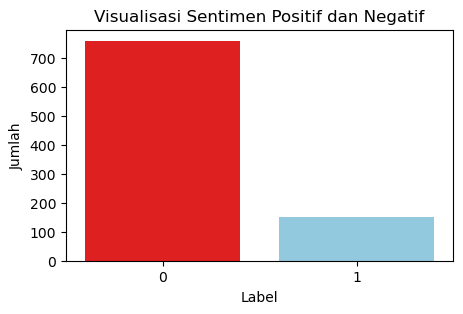

In [65]:
# visualisasi sentimen positif dan negatif
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Label', palette={0: "red", 1: "skyblue"})
plt.title('Visualisasi Sentimen Positif dan Negatif')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

In [46]:
# import library smote
from imblearn.over_sampling import SMOTE

In [48]:
# smote data
smote = SMOTE(random_state=0)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

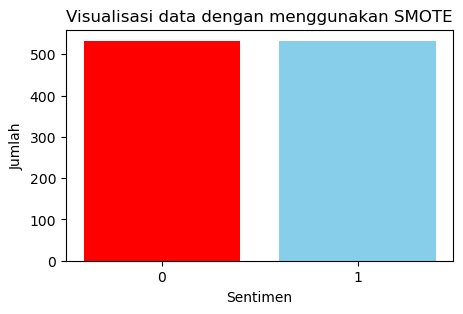

In [51]:
# menampilkan visualisasi data setelah dismote
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize=(5, 3))
plt.bar(sentimen_counts.index, sentimen_counts.values, color=['red', 'skyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualisasi data dengan menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['0', '1'])
plt.show()

In [52]:
# proses train dengan naive bayes
text_algorithm = MultinomialNB()

In [54]:
model = text_algorithm.fit(x_train_resampled, y_train_resampled)

In [55]:
# model prediksi
data_input = ("aplikasi nya bagus nya update tan update tan update tan nya bikin susah akses wishlist hilang menu keranjang keranjang hapus otomatis klik tong sampahrecycle bin update mudah sulit langgan updaten")
data_input = text_preprocessing_proses(data_input)

#load data
tfidf = TfidfVectorizer
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf_idf.sav","rb"))))

hasil = model.predict(loaded_vec.fit_transform([data_input]))

if(hasil==1):
    s = "Positif"
else:
    s = "Negatif"

print("Hasil Prediksi : ", s)

Hasil Prediksi :  Negatif


## evaluasi model

In [56]:
# masukan library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = model.predict(x_test)

CM = confusion_matrix(y_test, predicted)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       226
           1       0.61      0.66      0.63        47

    accuracy                           0.87       273
   macro avg       0.77      0.79      0.78       273
weighted avg       0.87      0.87      0.87       273



In [59]:
# membagi data kedalam data positif dan negatif
data_negatif = data[data['Label'] == 0]
data_positif = data[data['Label'] == 1]

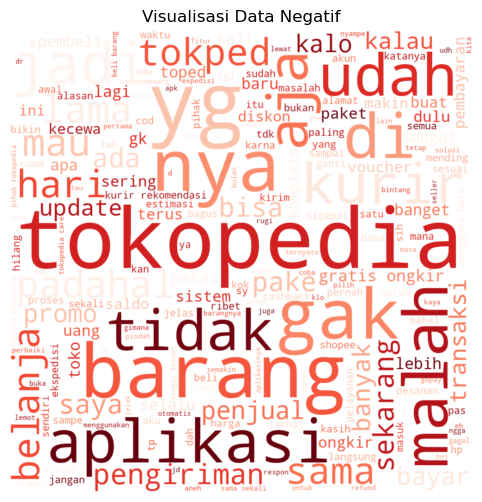

In [61]:
!pip -q install Wordcloud

from wordcloud import WordCloud
# visualisasi terhadap data negatif
all_text_s0 = ' '.join(word for word in data_negatif["ulasan"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud.to_image(), interpolation='bilinear')
#plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualisasi Data Negatif')
plt.margins(x=0, y=0)
plt.show()


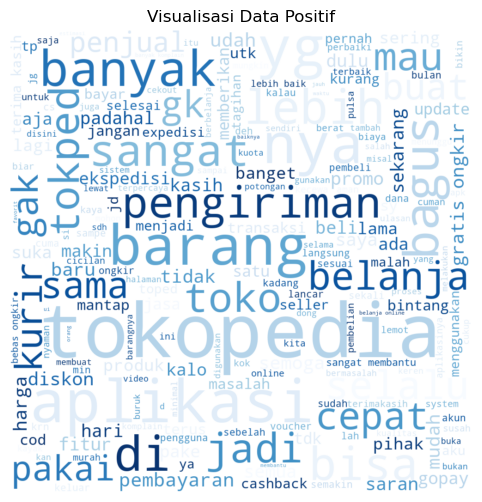

In [62]:
# visualisasi terhadap data positif
all_text_s1 = ' '.join(word for word in data_positif["ulasan"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
#wordcloud = WorldCloud(colormap='Blues', width=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Data Positif")
plt.margins(x=0, y=0)
plt.show()

In [66]:
# menyimpan model
pickle.dump(model,open("model_fraud.sav","wb"))